# Import ROOT

In [1]:
import ROOT

Welcome to JupyROOT 6.24/00


# import python array to use to store TTree branch

In [2]:
import array

# prepare the file to write out the dataset

In [3]:
fileout = ROOT.TFile("data.root", "recreate")

# create the TTree and the branch that will hold the data

In [4]:
sig = ROOT.TTree("sig", "Tree with exponential distribution")
x=array.array('f', [0])
sig.Branch("x", x, "x/F")

# setup a random number generator and define the parameters of the distributions we want to generate. Also the total number of events is floated

In [5]:
ran = ROOT.TRandom3(12345)
numValues = ran.Poisson(40000)
tau = 100.
m = 125.
sigma = 5.
nsig = 0

# throw random numbers

In [6]:
for i in range(numValues):
  isSig = ran.Rndm()<0.05
  if isSig:
      x[0] = ran.Gaus(m,sigma)
      nsig+=1
  else:
    x[0] = ran.Exp(tau);
  sig.Fill()

In [7]:
print(f'generated {nsig} sigal events')

generated 1964 sigal events


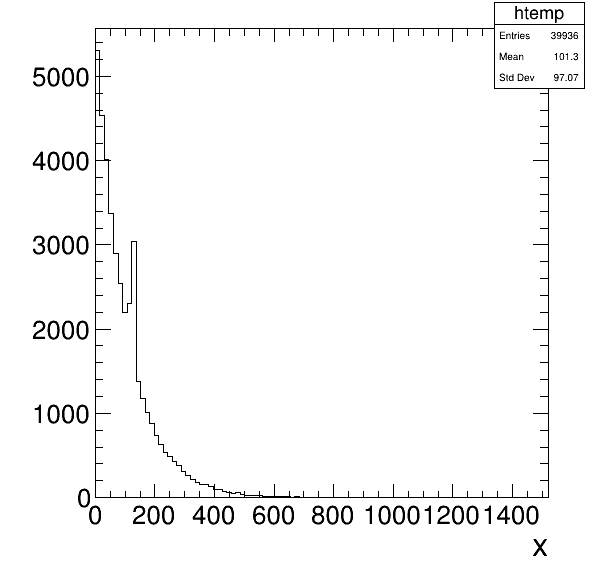

In [9]:
canvas = ROOT.TCanvas()
sig.Draw("x")
ROOT.gPad.Update()
ROOT.gPad.Draw()

In [10]:
fileout.Write()
fileout.Close()